# Exploring CIFAR100

In [1]:
from LSH_reduction import * 
import math
import time
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch
from random import choices
import copy
import os
import subprocess
from torchvision import transforms
import torch.nn as nn
import csv
import copy

cos_sim = lambda a,b: np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [3]:
## plot the first 15 similar images next to a given image vector
def plot_neighbours(rp, ix = None): 
    if not ix:
        ix = np.random.choice(rp.label_to_ixs[np.random.choice(list(rp.label_to_ixs.keys()))]) ## get a random index to find similar images
    print(f'index: {ix}')
    k = 15 ## find k most similar images

    t0 = time.time()
    vec = rp.array[ix]
    sim_ixs = sorted(list(rp.find_most_alike(ix)), key = lambda i: 1-cos_sim(rp.array[i], vec))[:15]
    print(f'time looking for neighbours: {time.time()-t0:.3f} s')

    f, axarr = plt.subplots(4,4, figsize = (7,7), constrained_layout = True)
    axarr[0][0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    axarr[0][0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    axarr[0][0].imshow(rp.array[ix].reshape(32,32,3).astype('int'), cmap='gray')
    axarr[0][0].set_title('Original image', fontsize = 9)
    for j in range(0,min(15, len(sim_ixs))):
        i = j+1
        axarr[i//4][i%4].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        axarr[i//4][i%4].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

        dist = 1-cos_sim(rp.array[ix], rp.array[sim_ixs[j]])
        axarr[i//4][i%4].set_title(f'{dist:.4f}', fontsize = 9)
        axarr[i//4][i%4].imshow(rp.array[sim_ixs[j]].reshape(32,32,3).astype('int'), cmap = 'gray')

In [2]:
# Downloading and getting the CIFAR100 letter dataset
trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("trainset len:", len(trainset))

Files already downloaded and verified
Files already downloaded and verified
trainset len: 50000


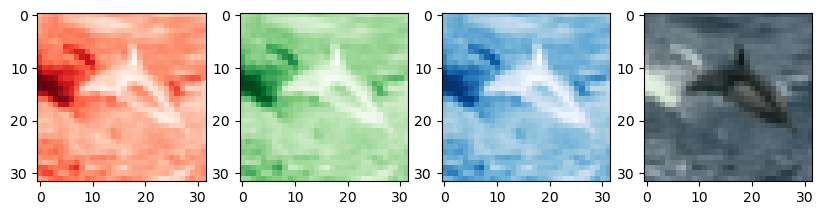

In [46]:
ix = np.random.randint(50000)
plt.figure(figsize=(10, 10))
plt.subplot(1, 4, 1)
plt.imshow(trainset.data[ix][:,:,0], cmap = 'Reds')
plt.subplot(1, 4, 2)
plt.imshow(trainset.data[ix][:,:,1], cmap = 'Greens')
plt.subplot(1, 4, 3)
plt.imshow(trainset.data[ix][:,:,2], cmap = 'Blues')
plt.subplot(1,4,4)
_ = plt.imshow(trainset.data[ix])

In [5]:
%%time
# Create instance of our rp class
rp = Random_projection_hash(trainset)
rp.hash_values()
rp.estimation()

Using: 8 bits, 10 hash tables
CPU times: user 24 s, sys: 2.34 s, total: 26.3 s
Wall time: 13.8 s


index: 37721
time looking for neighbours: 0.001 s


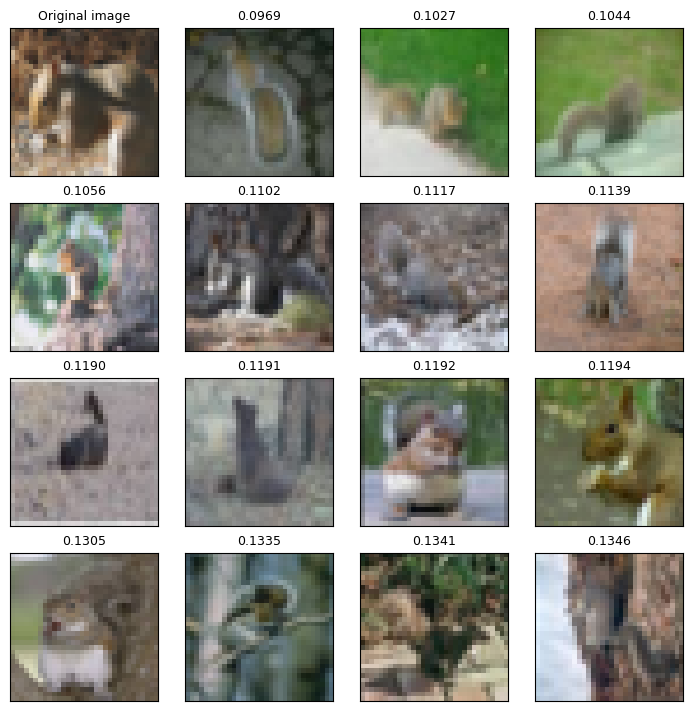

In [10]:
ix = np.random.randint(50000) ## Choosing a random value to plot its closest neighbours
plot_neighbours(rp, ix)

<BarContainer object of 100 artists>

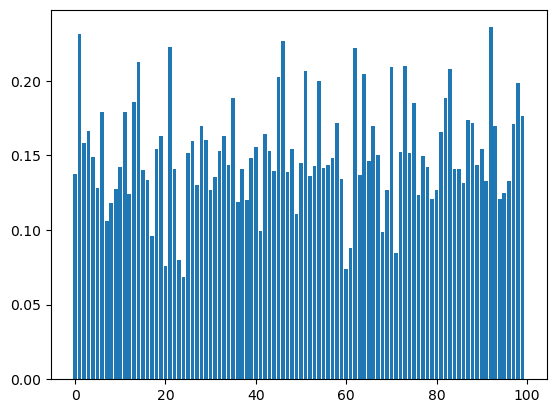

In [12]:
## Plotting the distribution of indexes among possible hashes
plt.bar(rp.est_mean.keys(), rp.est_mean.values())